# Saturation Detection
Saturation is a form of distortion that happens when the peaks of the waveform are squashed generating new harmonics.
There are several types of saturation.
The saturation produced by analog devices, such as tape recorders or tube amplifiers is traditionally considered to produce a warm, pleasant sound.
However, the saturation produced by digital clipping is generally considered to be musically displeasing.

The amount of saturation that can be considered acceptable is subjective and depends on factors such as the music genre.
However, in most cases, too much saturation may degrade the audio quality and can be considered an audio problem.

## A real saturated signal
We will use a heavily saturated audio clip to detect saturated regions:

In [1]:
from IPython.display import Audio
from essentia.standard import MonoLoader, SaturationDetector, FrameGenerator
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 9)

Text(0.5, 1.0, 'Saturated audio')

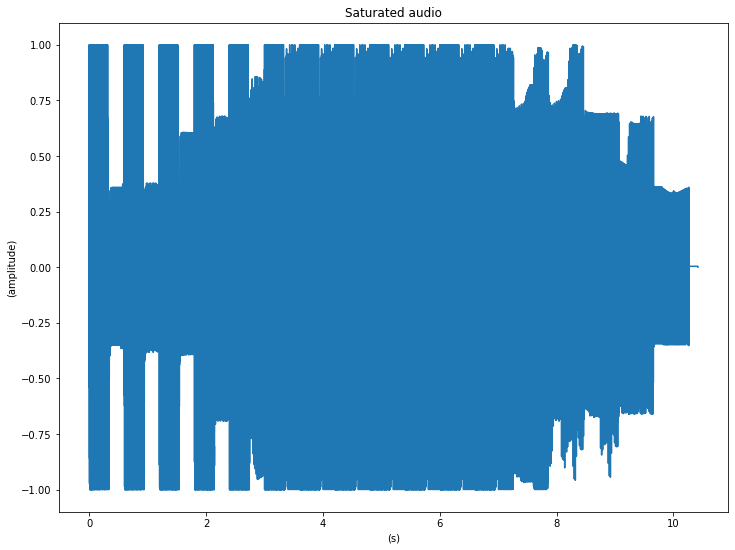

In [2]:
sr = 44100

audio_file = "../../../test/audio/recorded/distorted.wav"
audio = MonoLoader(filename=audio_file, sampleRate=sr)()

time = np.arange(len(audio)) / sr
plt.plot(time, audio)
plt.ylabel("(amplitude)")
plt.xlabel("(s)")
plt.title("Saturated audio")

Note how the signal is heavily squashed close to the [-1, 1] areas.

Now let's listen to it:

In [3]:
Audio(audio, rate=sr)

## Detecting saturation

[SaturationDetector](https://essentia.upf.edu/reference/std_SaturationDetector.html) outputs the staring/ending locations of the saturated regions
in seconds. Saturated regions are found through a tripe criterion:

1. samples in a saturated region should have more energy than a given threshold.
2. the difference between the samples in a saturated region should be smaller than a given threshold.
3. the duration of the saturated region should be longer than a given threshold.

*note: The algorithm was designed for framewise use and the returned timestamps are related to the first frame processed. Use reset() or configure() to restart the count.*

In [4]:
frame_size = 512
hop_size = 256

saturationDetector = SaturationDetector(frameSize=frame_size,
                                        hopSize=hop_size)

starts, ends = [], []
for frame in FrameGenerator(audio,
                            frameSize=frame_size,
                            hopSize=hop_size,
                            startFromZero=True):
    frame_starts, frame_ends = saturationDetector(frame)
    starts.extend(frame_starts)
    ends.extend(frame_ends)

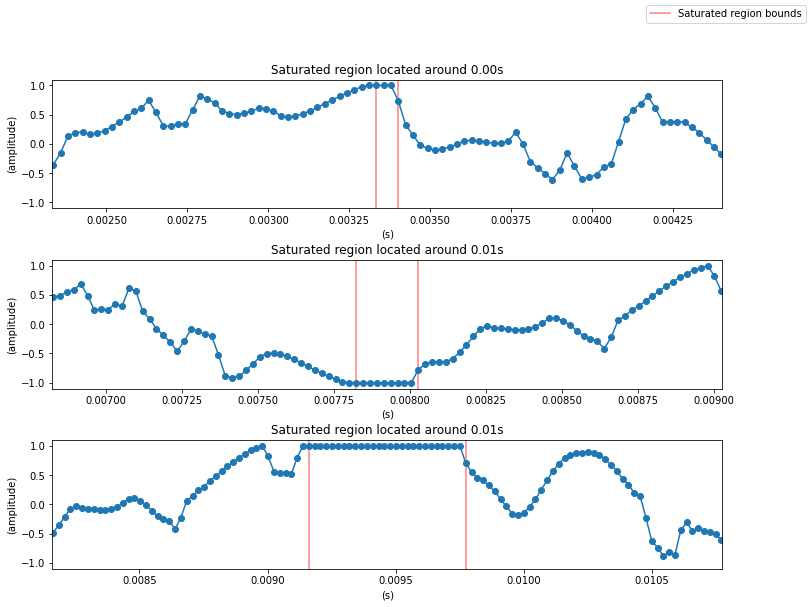

In [5]:
# Plot the first three saturated regions.
n = 3
fig, ax = plt.subplots(n)
plt.subplots_adjust(hspace=0.4)

for idx in range(3):
    l1 = ax[idx].axvline(starts[idx], color="r", alpha=0.5)
    ax[idx].axvline(ends[idx], color="r", alpha=0.5)
    ax[idx].plot(time, audio, marker="o")
    ax[idx].set_xlim([starts[idx] - 0.001, ends[idx] + 0.001])
    ax[idx].set_title("Saturated region located around {:.2f}s"\
        .format(np.mean([ends[idx], starts[idx]])))
    ax[idx].set_ylabel("(amplitude)")
    ax[idx].set_xlabel("(s)")

l1.set_label("Saturated region bounds")
fig.legend()